In [1]:
import warnings
warnings.filterwarnings("ignore")

# 高斯贝叶斯分类器(GaussianNB)

In [13]:
from sklearn import datasets,naive_bayes
from sklearn.model_selection import train_test_split
import  matplotlib.pyplot as plt
import numpy as np
# 加载 scikit-learn 自带的 digits 数据集
digits=datasets.load_digits() 
#分层采样拆分成训练集和测试集，测试集大小为原始数据集大小的 1/4
X_train,X_test,y_train,y_test=train_test_split(digits.data,digits.target,
                                               test_size=0.25,random_state=0,stratify=digits.target) 
# 测试 GaussianNB 的用法
def test_GaussianNB(*data):
    X_train,X_test,y_train,y_test=data
    cls=naive_bayes.GaussianNB()
    cls.fit(X_train,y_train)
    print('Training Score: %.2f' % cls.score(X_train,y_train))
    print('Testing Score: %.2f' % cls.score(X_test, y_test))
test_GaussianNB(X_train,X_test,y_train,y_test)

Training Score: 0.85
Testing Score: 0.84


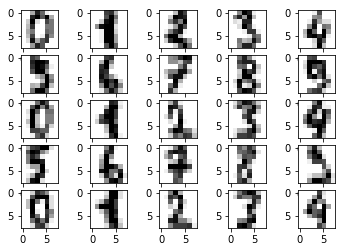

In [5]:
#  绘制 digits 数据集。这里只是绘制数据集中前 25 个样本的图片。
def show_digits():
    digits=datasets.load_digits()
    fig=plt.figure()
#     print("vector from images 0:",digits.data[0])
    for i in range(25):
        ax=fig.add_subplot(5,5,i+1)
        ax.imshow(digits.images[i],cmap=plt.cm.gray_r, interpolation='nearest')
    plt.show()
show_digits()

# 多项式贝叶斯分类器(MultinomialNB)

In [10]:
# 测试 MultinomialNB 的用法
def test_MultinomialNB(*data):
    X_train,X_test,y_train,y_test=data
    cls=naive_bayes.MultinomialNB()
    cls.fit(X_train,y_train)
    print('Training Score: %.2f' % cls.score(X_train,y_train))
    print('Testing Score: %.2f' % cls.score(X_test, y_test))
test_MultinomialNB(X_train,X_test,y_train,y_test)

Training Score: 0.91
Testing Score: 0.90


In [11]:
cls=naive_bayes.MultinomialNB()
??cls

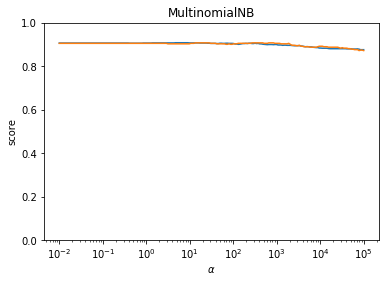

In [14]:
# 测试 MultinomialNB 的预测性能随 alpha 参数的影响
def test_MultinomialNB_alpha(*data):
    X_train,X_test,y_train,y_test=data
    alphas=np.logspace(-2,5,num=200)
    train_scores=[]
    test_scores=[]
    for alpha in alphas:
        cls=naive_bayes.MultinomialNB(alpha=alpha)
        cls.fit(X_train,y_train)
        train_scores.append(cls.score(X_train,y_train))
        test_scores.append(cls.score(X_test, y_test))

    ## 绘图
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    ax.plot(alphas,train_scores,label="Training Score")
    ax.plot(alphas,test_scores,label="Testing Score")
    ax.set_xlabel(r"$\alpha$")
    ax.set_ylabel("score")
    ax.set_ylim(0,1.0)
    ax.set_title("MultinomialNB")
    ax.set_xscale("log")
    plt.show()
test_MultinomialNB_alpha(X_train,X_test,y_train,y_test)

# 伯努利贝叶斯分类器(BernoulliNB)

In [15]:
#  测试 BernoulliNB 的用法
def test_BernoulliNB(*data):
    X_train,X_test,y_train,y_test=data
    cls=naive_bayes.BernoulliNB()
    cls.fit(X_train,y_train)
    print('Training Score: %.2f' % cls.score(X_train,y_train))
    print('Testing Score: %.2f' % cls.score(X_test, y_test))
test_BernoulliNB(X_train,X_test,y_train,y_test)

Training Score: 0.87
Testing Score: 0.87


In [16]:
??naive_bayes.BernoulliNB

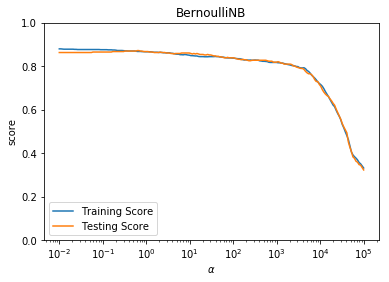

In [17]:
#  测试 BernoulliNB 的预测性能随 alpha 参数的影响
def test_BernoulliNB_alpha(*data):
    X_train,X_test,y_train,y_test=data
    alphas=np.logspace(-2,5,num=200)
    train_scores=[]
    test_scores=[]
    for alpha in alphas:
        cls=naive_bayes.BernoulliNB(alpha=alpha)
        cls.fit(X_train,y_train)
        train_scores.append(cls.score(X_train,y_train))
        test_scores.append(cls.score(X_test, y_test))

    ## 绘图
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    ax.plot(alphas,train_scores,label="Training Score")
    ax.plot(alphas,test_scores,label="Testing Score")
    ax.set_xlabel(r"$\alpha$")
    ax.set_ylabel("score")
    ax.set_ylim(0,1.0)
    ax.set_title("BernoulliNB")
    ax.set_xscale("log")
    ax.legend(loc="best")
    plt.show()
test_BernoulliNB_alpha(X_train,X_test,y_train,y_test)

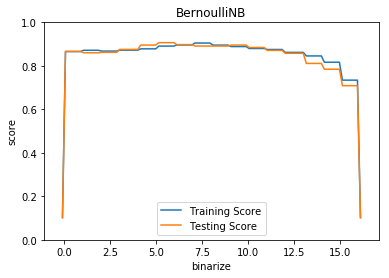

In [18]:
# 测试 BernoulliNB 的预测性能随 binarize 参数的影响
def test_BernoulliNB_binarize(*data):
    X_train,X_test,y_train,y_test=data
    min_x=min(np.min(X_train.ravel()),np.min(X_test.ravel()))-0.1
    max_x=max(np.max(X_train.ravel()),np.max(X_test.ravel()))+0.1
    binarizes=np.linspace(min_x,max_x,endpoint=True,num=100)
    train_scores=[]
    test_scores=[]
    for binarize in binarizes:
        cls=naive_bayes.BernoulliNB(binarize=binarize)
        cls.fit(X_train,y_train)
        train_scores.append(cls.score(X_train,y_train))
        test_scores.append(cls.score(X_test, y_test))

    ## 绘图
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    ax.plot(binarizes,train_scores,label="Training Score")
    ax.plot(binarizes,test_scores,label="Testing Score")
    ax.set_xlabel("binarize")
    ax.set_ylabel("score")
    ax.set_ylim(0,1.0)
    ax.set_xlim(min_x-1,max_x+1)
    ax.set_title("BernoulliNB")
    ax.legend(loc="best")
    plt.show()
test_BernoulliNB_binarize(X_train,X_test,y_train,y_test)